In [59]:
import snap
import pickle
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

%matplotlib inline

In [8]:
with open('./data/2016_q1_data.pickle', 'rb') as picklefile:
    q1d = pickle.load(picklefile)

In [100]:
def newman_weight(a, b, author_dict, project_dict):
    common = author_dict[a].intersection(author_dict[b])
    weight = 0
    for project in common:
        weight += 1.0/(len(project_dict[project])-1)
    return weight

In [101]:
def construct_newman_graph(df):
    author_dict = collections.defaultdict(set)
    project_dict = collections.defaultdict(set)
    weight_dict = collections.defaultdict(float)
    edge_seen = set()
    
    for i in range(df.shape[0]):
        project_dict[df.iloc[i,0]].add(df.iloc[i,1])
        author_dict[df.iloc[i,1]].add(df.iloc[i,0])
        
    projects = df['project_id'].unique()
    authors = df['author_id'].unique()
    G = snap.TNEANet.New()
    G.AddFltAttrE('weight')
    
    for author in authors:
        G.AddNode(author)
    for project in projects:
        p_authors = list(project_dict[project])
        edges = combinations(p_authors, 2)
        for src_id, dst_id in edges:
            if src_id > dst_id:
                src_id, dst_id = dst_id, src_id
            if (src_id, dst_id) not in edge_seen:
                weight_dict[(src_id, dst_id)] = newman_weight(src_id, dst_id, author_dict, project_dict)
    
    i = 0
    e_all = len(weight_dict.keys())
    print 'Total edges to be processed:', e_all
    print '------------------------------------'
    for src_id, dst_id in weight_dict.keys():
        i += 1
        if i%100000 == 0:
            print 'Processing edge', i
        eid = G.AddEdge(src_id, dst_id)
        G.AddFltAttrDatE(eid, weight_dict[(src_id, dst_id)], 'weight')
    
    """
    weight_dict = collections.defaultdict(float)
    i = 0
    e_all = G.getEdges()
    print 'Total edges to be processed:', e_all
    print '------------------------------------'
    for edge in G.Edges():
        i+=1
        if i%100000 == 0:
            print 'Processing edge', i
        src_id = edge.GetSrcNId()
        dst_id = edge.GetDstNId()
        eid = edge.GetId()
        weight = newman_weight(src_id, dst_id)
        weight_dict[(src_id, dst_id)] = weight
        G.AddFltAttrDatE(eid, weight, 'weight')
        """
    return G, weight_dict

In [102]:
G, weight_dict = construct_newman_graph(q1d)

Total edges to be processed: 4214668
------------------------------------
Processing edge 100000
Processing edge 200000
Processing edge 300000
Processing edge 400000
Processing edge 500000
Processing edge 600000
Processing edge 700000
Processing edge 800000
Processing edge 900000
Processing edge 1000000
Processing edge 1100000
Processing edge 1200000
Processing edge 1300000
Processing edge 1400000
Processing edge 1500000
Processing edge 1600000
Processing edge 1700000
Processing edge 1800000
Processing edge 1900000
Processing edge 2000000
Processing edge 2100000
Processing edge 2200000
Processing edge 2300000
Processing edge 2400000
Processing edge 2500000
Processing edge 2600000
Processing edge 2700000
Processing edge 2800000
Processing edge 2900000
Processing edge 3000000
Processing edge 3100000
Processing edge 3200000
Processing edge 3300000
Processing edge 3400000
Processing edge 3500000
Processing edge 3600000
Processing edge 3700000
Processing edge 3800000
Processing edge 3900000

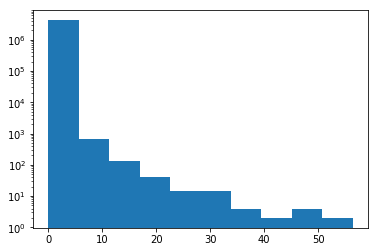

In [103]:
plt.hist(weight_dict.values(), log=True);

In [104]:
FOut = snap.TFOut("./data/2016_q1_newman.graph")
G.Save(FOut)
FOut.Flush()

In [112]:
FIn = snap.TFIn("./data/2016_q1_newman.graph")
G2 = snap.TNEANet.Load(FIn)

## Generate Graph for 2016 Q2

In [123]:
with open('./data/2016_q2_data.pickle', 'rb') as picklefile:
    q2d = pickle.load(picklefile)

In [125]:
G2, weight_dict2 = construct_newman_graph(q2d)

Total edges to be processed: 3558879
------------------------------------
Processing edge 100000
Processing edge 200000
Processing edge 300000
Processing edge 400000
Processing edge 500000
Processing edge 600000
Processing edge 700000
Processing edge 800000
Processing edge 900000
Processing edge 1000000
Processing edge 1100000
Processing edge 1200000
Processing edge 1300000
Processing edge 1400000
Processing edge 1500000
Processing edge 1600000
Processing edge 1700000
Processing edge 1800000
Processing edge 1900000
Processing edge 2000000
Processing edge 2100000
Processing edge 2200000
Processing edge 2300000
Processing edge 2400000
Processing edge 2500000
Processing edge 2600000
Processing edge 2700000
Processing edge 2800000
Processing edge 2900000
Processing edge 3000000
Processing edge 3100000
Processing edge 3200000
Processing edge 3300000
Processing edge 3400000
Processing edge 3500000


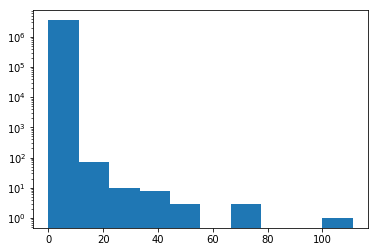

In [126]:
plt.hist(weight_dict2.values(), log=True);

In [127]:
FOut = snap.TFOut("./data/2016_q2_newman.graph")
G2.Save(FOut)
FOut.Flush()

In [122]:
## Commands to check edge and edge weight
FIn = snap.TFIn("./data/weight3-adjusted.graph")
Graph = snap.TNEANet.Load(FIn)
Graph.GetEId(413520, 141895)
Graph.GetFltAttrDatE(1364426, 'weight')

-1